In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data= pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1) Calculate the average age of survivors and non-survivors



In [23]:
# Calculate the average age of survivors
survived_avg_age = data[data['Survived'] == 1]['Age'].mean()

# Calculate the average age of non-survivors
nonsurvived_avg_age = data[data['Survived'] == 0]['Age'].mean()

# Print the results
print(f"Average age of survivors: {survived_avg_age}")
print(f"Average age of non-survivors: {nonsurvived_avg_age}")

Average age of survivors: 28.343689655172415
Average age of non-survivors: 30.62617924528302


2) replace missing values in embark_town with the most frequent value

In [12]:
# Find the most frequent value in 'Embarked'
most_frequent_embarked = data['Embarked'].mode()[0]
print(most_frequent_embarked)



S


In [15]:
filled= data['Embarked'].fillna(most_frequent_embarked, inplace=True)
print(filled)

None


<ipython-input-15-bf864962d560>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filled= data['Embarked'].fillna(most_frequent_embarked, inplace=True)


3) Plot a scatter plot for fare vs. age,coloring points by survival status

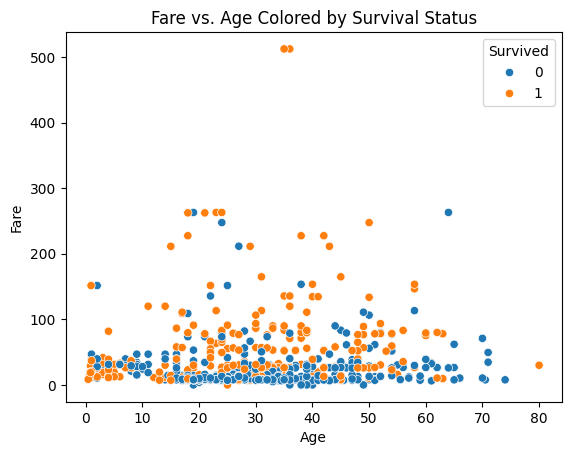

In [24]:
# Create the scatter plot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Fare vs. Age Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

4) Count the number of passangers who traveled alone

In [25]:
# Calculate the number of passengers traveling alone
alone_passengers = data[(data['SibSp'] == 0) & (data['Parch'] == 0)].shape[0]

# Print the result
print(f"Number of passengers traveling alone: {alone_passengers}")

Number of passengers traveling alone: 537


5) Identify which embarkation point had the highest survival rate

In [26]:
# Calculate survival rates for each embarkation point
embarkation_survival = data.groupby('Embarked')['Survived'].mean()

# Find the embarkation point with the highest survival rate
highest_survival_embarkation = embarkation_survival.idxmax()

# Print the result
print(f"Embarkation point with highest survival rate: {highest_survival_embarkation}")

Embarkation point with highest survival rate: C


6) Create a bar chart comparing survival rates across gender and class


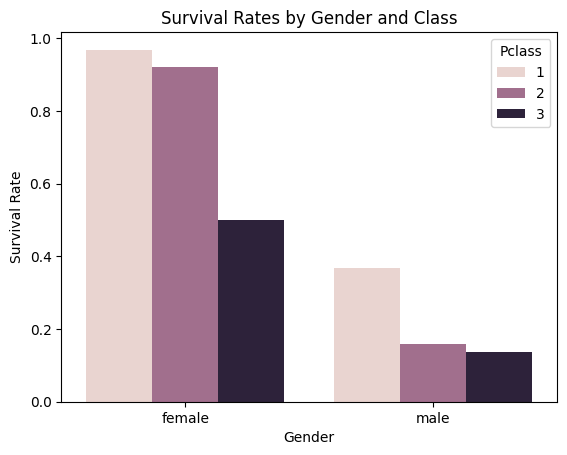

In [27]:
# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Group data by gender and class, then calculate survival rates
survival_rates = titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

# Create the bar chart
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=survival_rates)
plt.title('Survival Rates by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()